In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hann, hamming, butter, lfilter, freqz, resample
import scipy.io.wavfile as wav



def energy_based_speech_silence_discrimination(y, fs, frame_length, hop_length, threshold_factor,
                                               window_type='rectwin'):
    """
    y: tín hiệu âm thanh đầu vào
    fs: tần số lấy mẫu của tín hiệu
    frame_length: độ dài của từng khung tính toán năng lượng
    hop_length: độ dài bước nhảy giữa các khung
    threshold_factor: hệ số nhân với giá trị trung bình năng lượng để tính ngưỡng
    window_type: loại cửa sổ sử dụng để tính toán năng lượng của các khung
    """

    # Tạo cửa sổ tính toán năng lượng
    if window_type == 'hamming':
        window = hann(frame_length)
    elif window_type == 'hanning':
        window = hamming(frame_length)
    else:
        window = np.ones(frame_length)

    # Chia tín hiệu thành các khung và áp dụng cửa sổ
    frames = np.array([y[i:i + frame_length] * window for i in range(0, len(y) - frame_length, hop_length)])

    # Tính toán năng lượng của từng khung
    energy = np.sum(frames ** 2, axis=1)
    print("energy", energy)

    # Tính giá trị trung bình của năng lượng
    threshold = np.mean(energy) * threshold_factor

    # Phân loại các khung là tiếng nói hoặc im lặng
    is_speech = energy > threshold

    # Vẽ đồ thị
    time = np.arange(len(y)) / fs
    plt.subplot(2, 1, 1)
    plt.plot(time, y)
    plt.xlabel('Thời gian (s)')
    plt.ylabel('Amplitude')
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(is_speech)) * hop_length / fs, energy)
    plt.plot(np.arange(len(is_speech)) * hop_length / fs, np.ones(len(is_speech)) * threshold, 'r--')
    plt.xlabel('Thời gian (s)')
    plt.ylabel('Energy')
    plt.legend(['Energy', 'Threshold'])
    plt.show()

    return is_speech

energy [1.82254690e+07 1.84257370e+07 1.75556680e+07 1.60733270e+07
 1.93733830e+07 2.41460340e+07 2.49643340e+07 2.82279370e+07
 2.88069440e+07 3.07238300e+07 2.72993440e+07 2.63487510e+07
 2.90576370e+07 3.01691760e+07 2.89518910e+07 2.44038900e+07
 2.35297460e+07 1.93747710e+07 1.63025420e+07 1.66128710e+07
 2.15998340e+07 2.61596310e+07 2.21355740e+07 2.36897440e+07
 2.14630400e+07 2.59326540e+07 2.12948280e+07 2.17073290e+07
 2.84497210e+07 2.81560240e+07 2.72754720e+07 2.46677150e+07
 2.83291930e+07 2.74319030e+07 2.64137540e+07 2.64586780e+07
 2.17313800e+07 2.30309400e+07 2.43940430e+07 2.46227360e+07
 2.05164850e+07 1.87899750e+07 1.80860570e+07 1.98605060e+07
 1.91053490e+07 2.14946230e+07 2.64916300e+07 2.60789280e+07
 3.13179650e+07 2.59551980e+07 2.37653130e+07 2.92109500e+07
 4.05538210e+07 3.61337957e+08 2.99696264e+09 5.79862267e+09
 7.58945630e+09 8.07543706e+09 8.36157243e+09 8.21540744e+09
 8.84037209e+09 1.15006277e+10 1.71026106e+10 2.68173420e+10
 4.59773963e+10 4

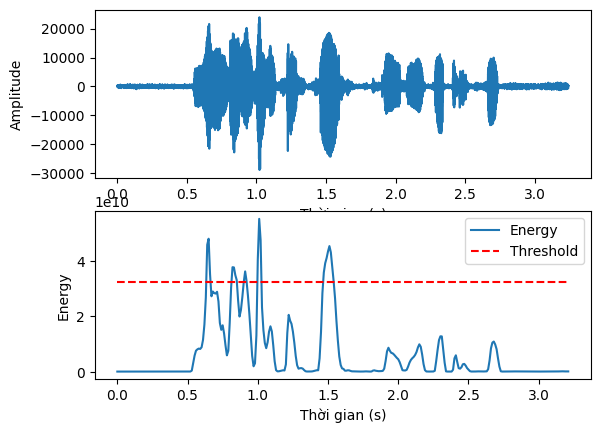

51840 400


In [6]:

fs,signal=wav.read('phone_F1.wav')
fr_time = 0.025;
fr_len = round(fr_time * fs);
energy_based_speech_silence_discrimination(signal, fs,fr_len,hop_length=int(fs*0.01), threshold_factor=5)
print(len(signal), fr_len)